# Graphical Models: Similarity Distribution Experimentation

In [2]:
# Import necessary libraries
from sde import *

# Tests - Edit Distance

In [3]:
def dgWithCliqs(num_cliq):   
    #create DAG
    rand_num_nodes = random.randint(num_cliq, num_cliq*3)
    dg = makeDirectedGraph(rand_num_nodes, int(rand_num_nodes*1.5))
    
    #count num of cliques in graph
    cliq_rem = clique.clique_removal(dg)
    cliqCount = len(cliq_rem[1])   
    
    # remake graph if it doesn't match the input
    if (cliqCount == num_cliq):
        return dg
    else:
        return dgWithCliqs(num_cliq)

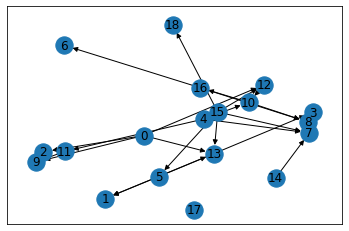

In [4]:
dg = dgWithCliqs(10)
nx.draw_networkx(dg)

Graph with 10 cliques

In [5]:
maxCliqs = clique.clique_removal(dg)
cliqueChoose2 = list(itertools.combinations(maxCliqs[1], 2))
#print(cliqueChoose2)

In [6]:
cliq_imm_sim = []
for pair in cliqueChoose2:
    imm_sim = get_immediate_similarity(dg, pair[0], pair[1])
    cliq_imm_sim.append(imm_sim)
    #print(pair, imm_sim)

# Edit Distance, immediate similarity

Between cliques

In [7]:
#function that accepts a graph, returns a list of all the immediate similarity values between clique pairs. 
#Do the same for node pairs.

def immSimCliqs(dg):
    cliq_rem = clique.clique_removal(dg)
    maxCliqs = cliq_rem[1]
    cliqueChoose2 = list(itertools.combinations(maxCliqs, 2))
    cliq_imm_sim = []
    for pair in cliqueChoose2:
        imm_sim = get_immediate_similarity(dg, pair[0], pair[1])
        cliq_imm_sim.append(imm_sim)
        #print(pair, imm_sim)
    return cliq_imm_sim

In [8]:
cliqNums = [10, 30, 50, 80, 100]
immSims = {}
avgImmSims = {}

for c in cliqNums:
    dg = dgWithCliqs(c)
    
    immSimsVals = immSimCliqs(dg)
    immSims[str(c) + ' cliques'] = immSimsVals
    
    avgIS = mean(immSimsVals)
    avgImmSims[str(c)] = avgIS

#print(immSims)
#print(avgImmSims)

In [ ]:
def cliqueIS(listOfCliqs):
    for c in listOfCliqs:
        #get immediate sim dictionary (indiv. and average)
        dg = dgWithCliqs(c)

        immSimsVals = immSimCliqs(dg)
        immSims[str(c) + ' cliques'] = immSimsVals

        avgIS = mean(immSimsVals)
        avgImmSims[str(c)] = avgIS
        
        #get full sim dicitonary (indiv. and average)

In [9]:
immSim_df = pd.DataFrame({ key:pd.Series(value) for key, value in immSims.items() })
immSim_df

,10 cliques,30 cliques,50 cliques,80 cliques,100 cliques
0,0.875846,1.0,1.0,1.0,1.0
1,0.967970,1.0,1.0,1.0,1.0
2,0.849415,1.0,1.0,1.0,1.0
3,0.939511,1.0,1.0,1.0,1.0
4,0.888632,1.0,1.0,1.0,1.0
...,...,...,...,...,...
4945,NaN,NaN,NaN,NaN,1.0
4946,NaN,NaN,NaN,NaN,1.0
4947,NaN,NaN,NaN,NaN,1.0
4948,NaN,NaN,NaN,NaN,1.0


In [10]:
"""# plot to compare immediate similarity values against number of cliques
for key in immSims.keys():
    plt.plot(list(immSims.get(key)))
    plt.title(key)
    plt.ylabel("Immediate Similarity between all cliques")
    plt.xlabel('Number of Nodes')
    plt.show()"""

'# plot to compare immediate similarity values against number of cliques\nfor key in immSims.keys():\n    plt.plot(list(immSims.get(key)))\n    plt.title(key)\n    plt.ylabel("Immediate Similarity between all cliques")\n    plt.xlabel(\'Number of Nodes\')\n    plt.show()'

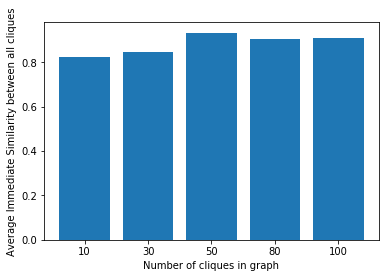

In [11]:
# bar chart to compare average immediate similarity values against number of cliques 
plt.bar(range(len(avgImmSims)), avgImmSims.values(), align='center')
plt.xticks(range(len(avgImmSims)), list(avgImmSims.keys()))
plt.ylabel('Average Immediate Similarity between all cliques')
plt.xlabel('Number of cliques in graph')
plt.show()


For entire graphs

In [13]:
cliqNums = [10, 30, 50, 80, 100]
graphImmSims = {}
avgGraphIS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    ed_imm_sim = []
    for pair in node_pairs:
        ed_imm_sim.append(get_immediate_similarity(gm, pair[0], pair[1]))
        ed_imm_sim.append(get_immediate_similarity(gm, pair[1], pair[0]))
        
    graphImmSims[str(c)] = ed_imm_sim
    avgGraphIS[str(c)] = mean(ed_imm_sim)

In [14]:
graphIS_df = pd.DataFrame({ key:pd.Series(value) for key, value in graphImmSims.items() })
graphIS_df

,10,30,50,80,100
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
28051,NaN,NaN,NaN,NaN,1.0
28052,NaN,NaN,NaN,NaN,1.0
28053,NaN,NaN,NaN,NaN,1.0
28054,NaN,NaN,NaN,NaN,1.0


In [15]:
#pd.to_excel()

In [16]:
"""# plot to compare immediate similarity values against number of cliques
for key in graphImmSims.keys():
    plt.plot(list(graphImmSims.get(key)))
    plt.title(key)
    plt.ylabel("Immediate Similarity")
    plt.xlabel('Number of Nodes')
    plt.show()"""

'# plot to compare immediate similarity values against number of cliques\nfor key in graphImmSims.keys():\n    plt.plot(list(graphImmSims.get(key)))\n    plt.title(key)\n    plt.ylabel("Immediate Similarity")\n    plt.xlabel(\'Number of Nodes\')\n    plt.show()'

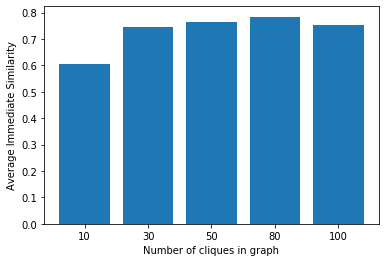

In [17]:
# bar chart to compare average immediate similarity values against number of cliques 
plt.bar(range(len(avgGraphIS)), avgGraphIS.values(), align='center')
plt.xticks(range(len(avgGraphIS)), list(avgGraphIS.keys()))
plt.ylabel('Average Immediate Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()

# Edit distance, full similarity

between all  cliques

In [18]:
def fullSimCliqs(dg):
    cliq_rem = clique.clique_removal(dg)
    maxCliqs = cliq_rem[1]
    cliqueChoose2 = list(itertools.combinations(maxCliqs, 2))
    cliq_full_sim = []
    for pair in cliqueChoose2:
        fullSim = get_full_similarity(dg, pair[0], pair[1])
        cliq_full_sim.append(fullSim)
        #print(pair, imm_sim)
    return cliq_full_sim

In [19]:
cliqNums = [10, 30, 50, 80, 100]
fullSims = {}
avgFS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    ed_full_sim = []
    for pair in node_pairs:
        ed_full_sim.append(get_full_similarity(gm, pair[0], pair[1]))
        ed_full_sim.append(get_full_similarity(gm, pair[1], pair[0]))
        
    fullSims[str(c)] = ed_full_sim
    avgFS[str(c)] = mean(ed_full_sim)

In [20]:
"""# plot to compare immediate similarity values against number of cliques
for key in fullSims.keys():
    plt.plot(list(fullSims.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Full Similarity between cliques")
    plt.xlabel('Number of Nodes')
    plt.show()"""

'# plot to compare immediate similarity values against number of cliques\nfor key in fullSims.keys():\n    plt.plot(list(fullSims.get(key)))\n    plt.title(key + \' cliques\')\n    plt.ylabel("Full Similarity between cliques")\n    plt.xlabel(\'Number of Nodes\')\n    plt.show()'

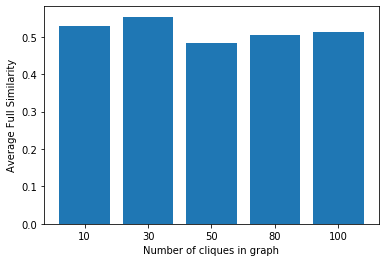

In [21]:
# bar chart to compare average full similarity values against number of cliques 
plt.bar(range(len(avgFS)), avgFS.values(), align='center')
plt.xticks(range(len(avgFS)), list(avgFS.keys()))
plt.ylabel('Average Full Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()


In [22]:
fullSims_df = pd.DataFrame({ key:pd.Series(value) for key, value in fullSims.items() })
fullSims_df

,10,30,50,80,100
0,0.841592,0.0,0.964927,0.0,0.014911
1,0.366368,0.0,0.088100,0.0,0.323959
2,0.875474,0.0,1.000000,0.0,0.995310
3,0.003792,1.0,1.000000,0.0,0.945283
4,0.678387,0.0,0.213760,0.0,1.000000
...,...,...,...,...,...
25435,NaN,NaN,NaN,NaN,0.000000
25436,NaN,NaN,NaN,NaN,0.038616
25437,NaN,NaN,NaN,NaN,0.170571
25438,NaN,NaN,NaN,NaN,0.000000


for entire graph

In [23]:
cliqNums = [10, 30, 50, 80, 100]
graphFS = {}
avgGraphFS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    graph_full_sim = []
    for pair in node_pairs:
        graph_full_sim.append(get_full_similarity(gm, pair[0], pair[1]))
        graph_full_sim.append(get_full_similarity(gm, pair[1], pair[0]))
        
    graphFS[str(c)] = graph_full_sim
    avgGraphFS[str(c)] = mean(graph_full_sim)

In [24]:
"""# plot to compare immediate similarity values against number of cliques
for key in graphFS.keys():
    plt.plot(list(graphFS.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Full Similarity")
    plt.xlabel('Number of Nodes')
    plt.show()"""

'# plot to compare immediate similarity values against number of cliques\nfor key in graphFS.keys():\n    plt.plot(list(graphFS.get(key)))\n    plt.title(key + \' cliques\')\n    plt.ylabel("Full Similarity")\n    plt.xlabel(\'Number of Nodes\')\n    plt.show()'

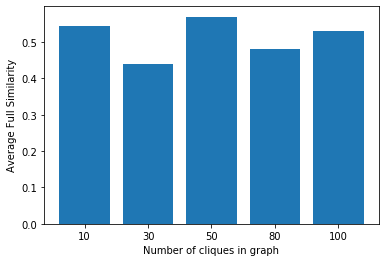

In [25]:
# bar chart to compare average full similarity values against number of cliques 
plt.bar(range(len(avgGraphFS)), avgGraphFS.values(), align='center')
plt.xticks(range(len(avgGraphFS)), list(avgGraphFS.keys()))
plt.ylabel('Average Full Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()


In [26]:
graphFS_df = pd.DataFrame({ key:pd.Series(value) for key, value in graphFS.items() })
graphFS_df

,10,30,50,80,100
0,0.105267,1.000000,1.0,0.821658,1.000000
1,0.850878,0.000000,1.0,0.094572,0.000000
2,1.000000,1.000000,1.0,0.843017,1.000000
3,0.000000,0.000000,1.0,0.058103,1.000000
4,1.000000,0.579305,1.0,1.000000,1.000000
...,...,...,...,...,...
24175,NaN,NaN,NaN,NaN,0.782618
24176,NaN,NaN,NaN,NaN,1.000000
24177,NaN,NaN,NaN,NaN,0.000000
24178,NaN,NaN,NaN,NaN,1.000000


get graph similarity data

In [36]:
#avg ed (full sim)
graphFS_df.to_excel(r"C:\Users\hanaa\OneDrive\jupyter excel files\AMISTAD 2020\cliqEDdata_graphavgFS.xlsx", index=True)

# Similarity method: Jaccard Index

In [29]:
cliqNums = [10, 30, 50, 80, 100]
jindices = {}
avgJI = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    ji_sim_1 = []
    for pair in node_pairs:
        ji_sim_1.append(calculate_jaccard_similarity(gm, pair[0], pair[1]))
        ji_sim_1.append(calculate_jaccard_similarity(gm, pair[1], pair[0]))
        
    jindices[str(c)] = ji_sim_1
    avgJI[str(c)] = mean(ji_sim_1)

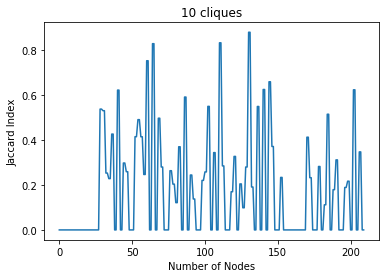

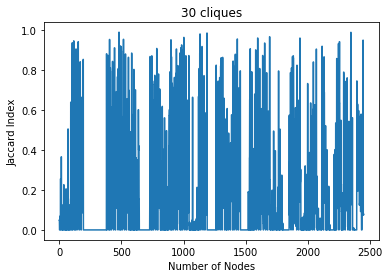

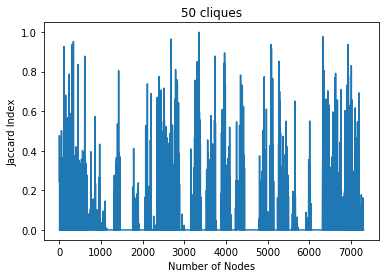

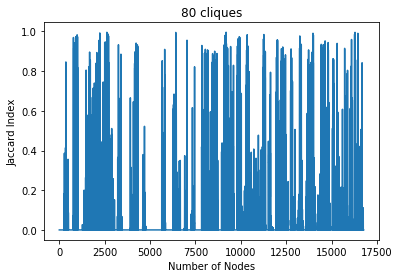

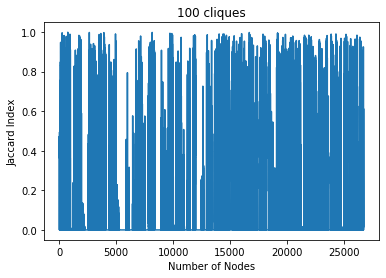

In [30]:
# plot to compare Jaccard similarity against number of cliques
for key in jindices.keys():
    plt.plot(list(jindices.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Jaccard Index")
    plt.xlabel('Number of Nodes')
    plt.show()

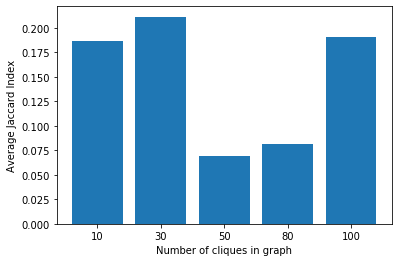

In [31]:
# bar chart to compare average Jaccard similarity against number of cliques 
plt.bar(range(len(avgJI)), avgJI.values(), align='center')
plt.xticks(range(len(avgJI)), list(avgJI.keys()))
plt.ylabel('Average Jaccard Index')
plt.xlabel('Number of cliques in graph')
plt.show()

In [32]:
jindices_df = pd.DataFrame({ key:pd.Series(value) for key, value in jindices.items() })
jindices_df

,10,30,50,80,100
0,0.0,0.048603,0.247435,0.0,0.365786
1,0.0,0.048603,0.247435,0.0,0.365786
2,0.0,0.000000,0.476578,0.0,0.379627
3,0.0,0.000000,0.476578,0.0,0.379627
4,0.0,0.000000,0.461517,0.0,0.005718
...,...,...,...,...,...
26727,NaN,NaN,NaN,NaN,0.000000
26728,NaN,NaN,NaN,NaN,0.216869
26729,NaN,NaN,NaN,NaN,0.216869
26730,NaN,NaN,NaN,NaN,0.016284


In [37]:
#graph Jaccard sim
jindices_df.to_excel(r"C:\Users\hanaa\OneDrive\jupyter excel files\AMISTAD 2020\cliqJIdata.xlsx", index=True)